In [1]:
%cd ..

/mnt/raid0_24TB/isaiah/code/NestedGraphs


In [2]:
import glob
import pickle
import torch 

HOME = 'inputs/Sept23/mal/'
gfiles = glob.glob(HOME+'*')

In [13]:
from utils.graph_utils import propagate_labels

ys = []
xs = []
for file in gfiles:
    with open(file, 'rb') as f:
        g = pickle.load(f)
        
        procs = (g.x[:,0] == 1).nonzero().squeeze(-1)
        xs.append(g.x[:,3:][procs])
        ys.append(propagate_labels(g, 23)[procs])

xs = torch.cat(xs,dim=0)
ys = torch.cat(ys,dim=0)

print(xs.size(),ys.size())

torch.Size([86389, 192]) torch.Size([86389])


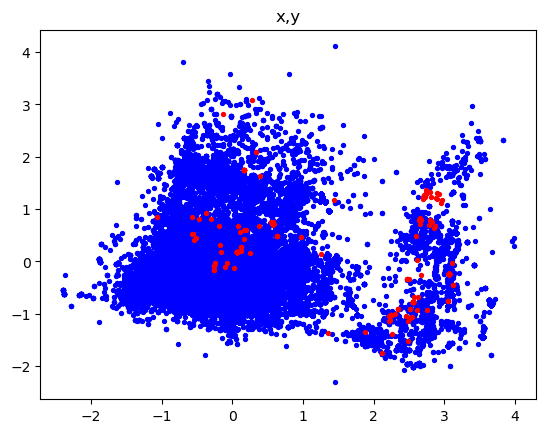

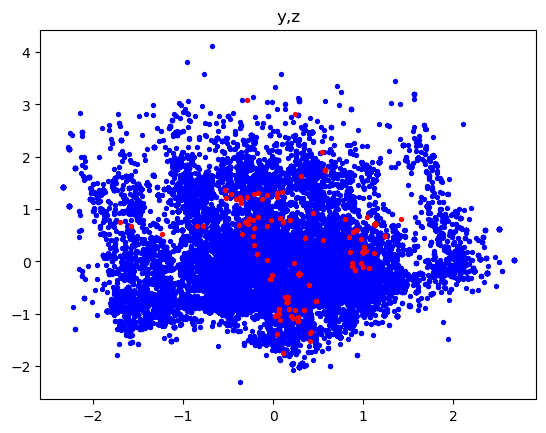

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)
xs_pca = pca.fit_transform(xs)

b = xs_pca[ys == 0]
m = xs_pca[ys > 0]

plt.scatter(b[:,0], b[:,1], color='blue', s=8)
plt.scatter(m[:,0], m[:,1], color='red', s=8)
plt.title('x,y')
plt.show()

plt.scatter(b[:,2], b[:,1], color='blue', s=8)
plt.scatter(m[:,2], m[:,1], color='red', s=8)
plt.title('y,z')
plt.show()

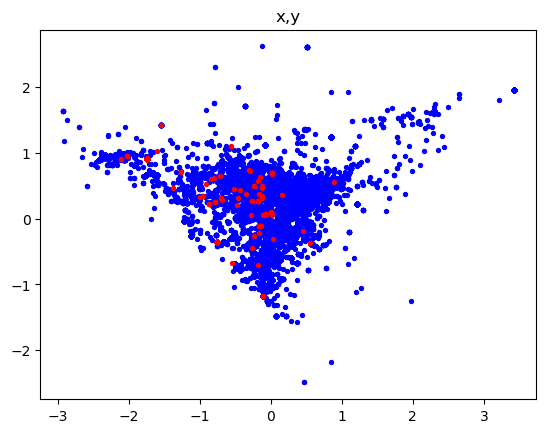

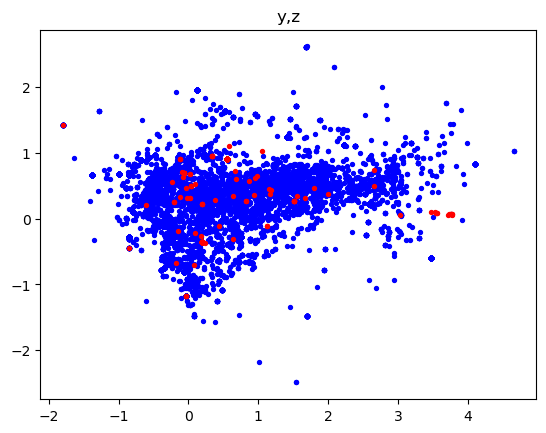

In [20]:
# Just module embeddings
pca2 = PCA(n_components=3)

valid = xs[:,-128:].pow(2).sum(dim=1) > 0
x_pca_2 = pca2.fit_transform(xs[valid,-128:])

b = x_pca_2[ys[valid] == 0]
m = x_pca_2[ys[valid] > 0]

plt.scatter(b[:,0], b[:,1], color='blue', s=8)
plt.scatter(m[:,0], m[:,1], color='red', s=8)
plt.title('x,y')
plt.show()

plt.scatter(b[:,2], b[:,1], color='blue', s=8)
plt.scatter(m[:,2], m[:,1], color='red', s=8)
plt.title('y,z')
plt.show()

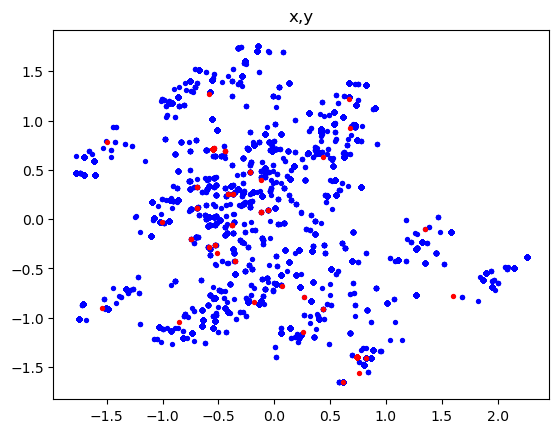

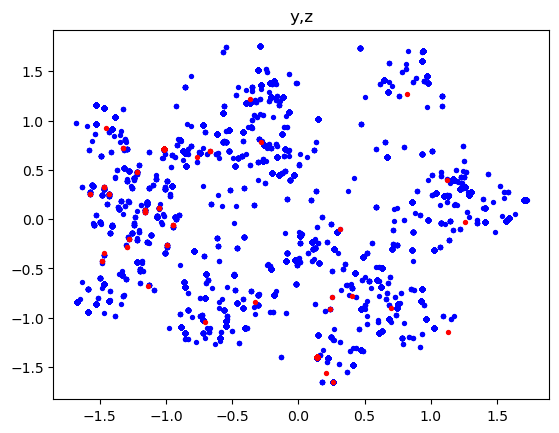

In [21]:
# Just proc name embeddings
pca3 = PCA(n_components=3)

valid = xs[:,:-128].pow(2).sum(dim=1) > 0
x_pca_3 = pca3.fit_transform(xs[valid,:-128])

b = x_pca_3[ys[valid] == 0]
m = x_pca_3[ys[valid] > 0]

plt.scatter(b[:,0], b[:,1], color='blue', s=8)
plt.scatter(m[:,0], m[:,1], color='red', s=8)
plt.title('x,y')
plt.show()

plt.scatter(b[:,2], b[:,1], color='blue', s=8)
plt.scatter(m[:,2], m[:,1], color='red', s=8)
plt.title('y,z')
plt.show()